<a href="https://colab.research.google.com/github/sharmaarjun1228/Justwatch_webscrapping_using_python/blob/main/Numerical_Programming_in_Python(Justwatch)_Web_Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Web Scraping & Data Handling Challenge**



### **Website:**
JustWatch -  https://www.justwatch.com/in/movies?release_year_from=2000


### **Description:**

JustWatch is a popular platform that allows users to search for movies and TV shows across multiple streaming services like Netflix, Amazon Prime, Hulu, etc. For this assignment, you will be required to scrape movie and TV show data from JustWatch using Selenium, Python, and BeautifulSoup. Extract data from HTML, not by directly calling their APIs. Then, perform data filtering and analysis using Pandas, and finally, save the results to a CSV file.

### **Tasks:**

**1. Web Scraping:**

Use BeautifulSoup to scrape the following data from JustWatch:

   **a. Movie Information:**

      - Movie title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the movie page on JustWatch

   **b. TV Show Information:**

      - TV show title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the TV show page on JustWatch

  **c. Scope:**

```
 ` - Scrape data for at least 50 movies and 50 TV shows.
   - You can choose the entry point (e.g., starting with popular movies,
     or a specific genre, etc.) to ensure a diverse dataset.`

```


**2. Data Filtering & Analysis:**

   After scraping the data, use Pandas to perform the following tasks:

   **a. Filter movies and TV shows based on specific criteria:**

   ```
      - Only include movies and TV shows released in the last 2 years (from the current date).
      - Only include movies and TV shows with an IMDb rating of 7 or higher.
```

   **b. Data Analysis:**

   ```
      - Calculate the average IMDb rating for the scraped movies and TV shows.
      - Identify the top 5 genres that have the highest number of available movies and TV shows.
      - Determine the streaming service with the most significant number of offerings.
      
   ```   

**3. Data Export:**

```
   - Dump the filtered and analysed data into a CSV file for further processing and reporting.

   - Keep the CSV file in your Drive Folder and Share the Drive link on the colab while keeping view access with anyone.
```

**Submission:**
```
- Submit a link to your Colab made for the assignment.

- The Colab should contain your Python script (.py format only) with clear
  comments explaining the scraping, filtering, and analysis process.

- Your Code shouldn't have any errors and should be executable at a one go.

- Before Conclusion, Keep your Dataset Drive Link in the Notebook.
```



**Note:**

1. Properly handle errors and exceptions during web scraping to ensure a robust script.

2. Make sure your code is well-structured, easy to understand, and follows Python best practices.

3. The assignment will be evaluated based on the correctness of the scraped data, accuracy of data filtering and analysis, and the overall quality of the Python code.








# **Start The Project**

## **Task 1:- Web Scrapping**

In [1]:
#Installing all necessary labraries
!pip install bs4
!pip install requests

In [2]:
#import all necessary labraries
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
from urllib.parse import urljoin

## **Scrapping Movies Data**

In [3]:
# Specifying the URL from which movies related data will be fetched
url='https://www.justwatch.com/in/movies?release_year_from=2000'

# Sending an HTTP GET request to the URL
page=requests.get(url)
# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup=BeautifulSoup(page.text,'html.parser')
# Printing the prettified HTML content
print(soup.prettify())

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

## **Fetching Movie URL's**

In [4]:
# Write Your Code here
# Find all 'a' tags, assuming movie links are in 'a' tags
# You might need to adjust this if the structure is different
links = soup.find_all('link', href=True)

# Filter or process the links as needed
# This example prints all href values, but you might want to filter these
for link in links:
    print(link['href'])

https://app.usercentrics.eu
https://graphql.usercentrics.eu
https://api.usercentrics.eu
https://consents.usercentrics.eu
/appassets/fonts/lato-regular.woff2
/appassets/fonts/lato-700.woff2
/appassets/fonts/lato-900.woff2
/appassets/fonts/anton.woff
/appassets/favicon.ico
https://images.justwatch.com
https://www.googletagmanager.com/
https://ib.adnxs.com
https://www.justwatch.com/in/movies
https://www.justwatch.com/ad/pellicules
https://www.justwatch.com/ae/movies
https://www.justwatch.com/ag/movies
https://www.justwatch.com/al/filmat
https://www.justwatch.com/ao/filmes
https://www.justwatch.com/ar/peliculas
https://www.justwatch.com/at/Filme
https://www.justwatch.com/au/movies
https://www.justwatch.com/az/filmlər
https://www.justwatch.com/ba/filmovi
https://www.justwatch.com/bb/movies
https://www.justwatch.com/be/films
https://www.justwatch.com/bf/films
https://www.justwatch.com/bg/филми
https://www.justwatch.com/bh/movies
https://www.justwatch.com/bm/movies
https://www.justwatch.com/b

In [5]:
# Extract movie URLs and prepend the base URL
base_url = 'https://www.justwatch.com'
movie_links = soup.find_all('a', class_='title-list-grid__item--link')
movie_urls_list = [urljoin(base_url, link['href']) for link in movie_links]

In [6]:
# Lists to store data
movie_urls = []
movie_names = []


In [7]:
# Create a list of movie names and URLs
for movie_url in movie_urls_list:
    response = requests.get(movie_url)
    soup_movie = BeautifulSoup(response.text, 'html.parser')

    # Find the movie name within the specified h1 tag
    h1_tag = soup_movie.find('h1')
    if h1_tag:
        movie_name = h1_tag.text.strip()
        movie_names.append(movie_name)
        movie_urls.append(movie_url)
    else:
        movie_names.append("Movie name not found")
        movie_urls.append("URL not found")

# Ensure that the lengths match before creating the DataFrame
if len(movie_urls) == len(movie_names):
    # Create a DataFrame from the lists
    data = {
        'Movie Name': movie_names,
        'Movie URL': movie_urls
    }

    # Create a DataFrame from the dictionary
    movies_dataframe = pd.DataFrame(data)

    # Display the DataFrame
    print(movies_dataframe)
else:
    print("Error: Lengths of Movie URLs List and Movie Names List do not match.")



                         Movie Name  \
0                            Salaar   
1                            Animal   
2                              Dune   
3                             Dunki   
4                         12th Fail   
..                              ...   
95                      Section 375   
96             Inglourious Basterds   
97               Kaathal – The Core   
98  Rocky Aur Rani Kii Prem Kahaani   
99          Spider-Man: No Way Home   

                                            Movie URL  
0           https://www.justwatch.com/in/movie/salaar  
1      https://www.justwatch.com/in/movie/animal-2022  
2        https://www.justwatch.com/in/movie/dune-2021  
3            https://www.justwatch.com/in/movie/dunki  
4        https://www.justwatch.com/in/movie/12th-fail  
..                                                ...  
95     https://www.justwatch.com/in/movie/section-375  
96  https://www.justwatch.com/in/movie/inglourious...  
97  https://www.justwatch.c

## **Scrapping Movie Title**

In [8]:
"""## **Scrapping Movie Title**"""

soup = BeautifulSoup(page.text, 'html.parser')

# List to store movie titles
movie_titles = []

# All anchors with class 'title-list-grid__item--link'
movie_anchors = soup.find_all('a', class_='title-list-grid__item--link')

# Extract movie titles from the 'img' tag within each anchor
for movie_anchor in movie_anchors:
    img_tag = movie_anchor.find('img')
    if img_tag:
        movie_title = img_tag['alt']
        movie_titles.append(movie_title)
    else:
        movie_titles.append("Title not found")

# Create a DataFrame with movie titles
titles_dataframe = pd.DataFrame({'Title': movie_titles})

# Display the DataFrame
titles_dataframe




,Title
0,Salaar
1,Animal
2,Dune
3,Dunki
4,12th Fail
...,...
95,Section 375
96,Inglourious Basterds
97,Kaathal – The Core
98,Rocky Aur Rani Kii Prem Kahaani


In [9]:
movies = soup.find_all('div', class_='title-list-grid__item')

for movie in movies:
     # Extracting the movie title from the alt attribute of img tag
        movie_title = movie.find('img')['alt']

        print(f"Movie Title: {movie_title}")

Movie Title: Salaar
Movie Title: Animal
Movie Title: Dune
Movie Title: Dunki
Movie Title: 12th Fail
Movie Title: Oppenheimer
Movie Title: The Kerala Story
Movie Title: Anyone But You
Movie Title: Sam Bahadur
Movie Title: Guntur Kaaram
Movie Title: Captain Miller
Movie Title: Ayalaan
Movie Title: Hanu-Man
Movie Title: Aquaman and the Lost Kingdom
Movie Title: Poor Things
Movie Title: Fighter
Movie Title: Teri Baaton Mein Aisa Uljha Jiya
Movie Title: Article 370
Movie Title: Eagle
Movie Title: Jawan
Movie Title: The Marvels
Movie Title: Neru
Movie Title: Bhakshak
Movie Title: Upgraded
Movie Title: Migration
Movie Title: Anatomy of a Fall
Movie Title: The Beekeeper
Movie Title: Sapta Sagaradaache Ello: Side B
Movie Title: Singapore Saloon
Movie Title: 365 Days
Movie Title: Hi Nanna
Movie Title: Code 8
Movie Title: American Fiction
Movie Title: Dune: Part Two
Movie Title: Killers of the Flower Moon
Movie Title: Warning 2
Movie Title: Interstellar
Movie Title: Harry Potter and the Philosoph

In [10]:
movies = soup.find_all('div', class_='filter-release-year')

for movie in movies:
     # Extracting the movie title from the alt attribute of img tag
        movie_title = movie.find('img')['alt']

        # Constructing the full movie URL
        # Assuming you have the correct base URL
        base_url = "https://www.justwatch.com"
        movie_url = base_url + movie.find('a')['href']

        # Extracting the movie poster URL
        movie_poster_url = movie.find('img')['src']

        print(f"Movie Title: {movie_title}")
        print(f"Movie URL: {movie_url}")
        print(f"Movie Poster URL: {movie_poster_url}")
        print("---")

In [11]:
for year in movies:
     # Extracting the movie title from the alt attribute of img tag
        movie_year = year.find('img')['alt']

        print(movie_year)

In [12]:


 # Assuming movies are still within 'title-list-grid__item'
movies = soup.find_all('div', class_='title-list-grid__item')

for movie in movies:
        movie_title = movie.find('img')['alt']
        base_url = "https://www.justwatch.com"
        movie_url = base_url + movie.find('a')['href']
        movie_poster_url = movie.find('img')['src']

        # Assuming the release year needs to be extracted from the title or another tag
        # Example: "Movie Title (2023)"
        # This is a simplification. Your actual extraction logic might need to be different.
        release_year = None
        if '(' in movie_title and ')' in movie_title:
            release_year = movie_title.split('(')[-1].split(')')[0]

        # If the release year is in a separate tag, you would need to find that tag.
        # For example, if it's in a <span> with a specific class (replace 'release-year-class' with the actual class name):
        # release_year_span = movie.find('span', class_='release-year-class')
        # if release_year_span:
        #     release_year = release_year_span.text.strip()

        print(f"Movie Title: {movie_title}")
        print(f"Release Year: {release_year}")
        print(f"Movie URL: {movie_url}")
        print(f"Movie Poster URL: {movie_poster_url}")
        print("---")
else:
    print("Failed to retrieve the webpage")

Movie Title: Salaar
Release Year: None
Movie URL: https://www.justwatch.com/in/movie/salaar
Movie Poster URL: https://www.justwatch.com/images/poster/310502799/s166/salaar
---
Movie Title: Animal
Release Year: None
Movie URL: https://www.justwatch.com/in/movie/animal-2022
Movie Poster URL: https://www.justwatch.com/images/poster/307624479/s166/animal-2022
---
Movie Title: Dune
Release Year: None
Movie URL: https://www.justwatch.com/in/movie/dune-2021
Movie Poster URL: https://www.justwatch.com/images/poster/249473713/s166/dune-2021
---
Movie Title: Dunki
Release Year: None
Movie URL: https://www.justwatch.com/in/movie/dunki
Movie Poster URL: https://www.justwatch.com/images/poster/311480360/s166/dunki
---
Movie Title: 12th Fail
Release Year: None
Movie URL: https://www.justwatch.com/in/movie/12th-fail
Movie Poster URL: data:image/gif;base64,R0lGODlhAQABAAAAACH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==
---
Movie Title: Oppenheimer
Release Year: None
Movie URL: https://www.justwatch.com/in/movie/

## **Scrapping release Year**

In [13]:
# Write Your Code here
"""## **Scrapping release Year**"""

# All anchor tags with class "title-list-grid__item--link"
movie_links = soup.find_all('a', class_='title-list-grid__item--link')

# Lists to store data
movie_names = []
release_years_list = []

# Iterate through each movie URL and scrape data
for movie_link in movie_links:
    # Extract movie URL and prepend the base URL
    movie_url = urljoin(base_url, movie_link['href'])
    response = requests.get(movie_url)
    soup_movie = BeautifulSoup(response.text, 'html.parser')

    # Find the movie name within the specified h1 tag
    h1_tag = soup_movie.find('h1')
    if h1_tag:
        movie_name = h1_tag.text.strip()
    else:
        movie_name = "Movie name not found"

    # Find the span tag with class "text-muted" inside the h1 tag
    release_span = soup_movie.find('span', class_='text-muted')

    # Extract the release year from the release span
    if release_span:
        release_year = release_span.text.strip().replace('(', '').replace(')', '')
    else:
        release_year = "Release year not found"

    # Append data to lists
    movie_names.append(movie_name)
    release_years_list.append(release_year)

# Create a DataFrame from the lists
movies_dataframe = pd.DataFrame({
    'Movie Name': movie_names,
    'Release Year': release_years_list
})

# Display the DataFrame
movies_dataframe

,Movie Name,Release Year
0,Salaar,2023
1,Animal,2023
2,Dune,2021
3,Dunki,2023
4,12th Fail,2023
...,...,...
95,Section 375,2019
96,Inglourious Basterds,2009
97,Kaathal – The Core,2023
98,Rocky Aur Rani Kii Prem Kahaani,2023


## **Scrapping Genres**

In [14]:

# Write Your Code here
for movie in movies:
        movie_title = movie.find('img')['alt']
        base_url = "https://www.justwatch.com"
        movie_url = base_url + movie.find('a')['href']
        movie_poster_url = movie.find('img')['src']

print(f"Movie Title: {movie_title}")
print(f"Release Year: {release_year}")
print(f"Movie URL: {movie_url}")
print(f"Movie Poster URL: {movie_poster_url}")
print("---")

Movie Title: Spider-Man: No Way Home
Release Year: 2021
Movie URL: https://www.justwatch.com/in/movie/spider-man-no-way-home
Movie Poster URL: data:image/gif;base64,R0lGODlhAQABAAAAACH5BAEKAAEALAAAAAABAAEAAAICTAEAOw==
---


In [15]:
"""## **Scrapping Genres**"""

# Find all anchor tags with class "title-list-grid__item--link"
movie_links = soup.find_all('a', class_='title-list-grid__item--link')

# Lists to store data
movie_names = []
genres_list = []

# Iterate through each movie URL and scrape data
for movie_link in movie_links:
    # Extract movie URL and prepend the base URL
    movie_url = urljoin(base_url, movie_link['href'])
    response = requests.get(movie_url)
    soup_movie = BeautifulSoup(response.text, 'html.parser')

    # Find the movie name within the specified h1 tag
    h1_tag = soup_movie.find('h1')
    if h1_tag:
        movie_name = h1_tag.text.strip()
    else:
        movie_name = "Movie name not found"

    # Find the "Genres" label
    genres_label = soup_movie.find('h3', class_='detail-infos__subheading', string='Genres')

    # Check if the "Genres" label is found
    if genres_label:
        # Find the corresponding div tag with genres information
        genres_div = genres_label.find_next('div', class_='detail-infos__value')

        # Extract the genres
        if genres_div:
            genres = genres_div.text.strip()
        else:
            genres = "Genres not found"
    else:
        genres = "Genres not found"

    # Append data to lists
    movie_names.append(movie_name)
    genres_list.append(genres)

# Create a DataFrame from the lists
movies_dataframe = pd.DataFrame({
    'Movie Name': movie_names,
    'Genres': genres_list
})

# Display the DataFrame
movies_dataframe


,Movie Name,Genres
0,Salaar,"Mystery & Thriller, Action & Adventure, Crime,..."
1,Animal,"Action & Adventure, Drama, Crime, Mystery & Th..."
2,Dune,"Action & Adventure, Science-Fiction, Drama"
3,Dunki,"Comedy, Drama"
4,12th Fail,Drama
...,...,...
95,Section 375,"Crime, Drama, Mystery & Thriller"
96,Inglourious Basterds,"Mystery & Thriller, War & Military, Drama"
97,Kaathal – The Core,"Drama, Crime"
98,Rocky Aur Rani Kii Prem Kahaani,"Comedy, Drama, Kids & Family, Romance"


## **Scrapping IMBD Rating**

In [16]:
# Write Your Code here
# Lists to store data
movie_names = []
imdb_ratings_list = []

# Iterate through each movie URL and scrape data
for movie_url in movie_urls:
    response = requests.get(movie_url)
    soup_movie = BeautifulSoup(response.text, 'html.parser')

    # Find the movie name within the specified div and class
    title_block = soup_movie.find('div', class_='title-block')
    if title_block:
        movie_name = title_block.find('h1').text.strip()
    else:
        movie_name = "Movie name not found"

    # Find the div tag containing IMDb rating
    div_tags = soup_movie.find_all('div', class_='jw-scoring-listing__rating')  # Replace with the actual class

    # Extract the IMDb rating
    imdb_rating = None
    for div_tag in div_tags:
        img_tag = div_tag.find('img', alt='IMDB')
        if img_tag:
            imdb_rating_span = div_tag.find('span')
            if imdb_rating_span:
                # Extract only the numeric part of IMDb rating
                imdb_rating = imdb_rating_span.text.strip().split()[0]
                break

    # Append data to lists
    movie_names.append(movie_name)
    imdb_ratings_list.append(imdb_rating)

# Create a DataFrame from the lists
data = {
    'Movie Name': movie_names,
    'IMDb Rating': imdb_ratings_list
}

# Create a DataFrame from the dictionary
movies_dataframe = pd.DataFrame(data)

# Display the DataFrame
movies_dataframe


,Movie Name,IMDb Rating
0,Salaar,6.5
1,Animal,6.3
2,Dune,8.0
3,Dunki,6.8
4,12th Fail,9.1
...,...,...
95,Section 375,8.1
96,Inglourious Basterds,8.4
97,Kaathal – The Core,7.6
98,Rocky Aur Rani Kii Prem Kahaani,6.5


## **Scrapping Runtime/Duration**

In [17]:
"""## **Scrapping Runtime/Duration**"""

# Lists to store data
movie_names = []
runtimes_list = []

# Iterate through each movie URL and scrape data
for movie_url in movie_urls:
    response = requests.get(movie_url)
    soup_movie = BeautifulSoup(response.text, 'html.parser')

    # Find the movie name within the specified h1 tag
    h1_tag = soup_movie.find('h1')
    if h1_tag:
        movie_name = h1_tag.text.strip()
    else:
        movie_name = "Movie name not found"

    # Find the "Runtime" label
    runtime_label = soup_movie.find('h3', class_='detail-infos__subheading', string='Runtime')

    # Check if the "Runtime" label is found
    if runtime_label:
        # Find the corresponding div tag with runtime information
        runtime_div = runtime_label.find_next('div', class_='detail-infos__value')

        # Extract the numeric part of the runtime
        if runtime_div:
            runtime = runtime_div.text.strip().split()[0]
        else:
            runtime = "Runtime information not found"
    else:
        runtime = "Runtime information not found"

    # Append data to lists
    movie_names.append(movie_name)
    runtimes_list.append(runtime)

# Create a DataFrame from the lists
data = {
    'Movie Name': movie_names,
    'Runtime': runtimes_list
}

# Create a DataFrame from the dictionary
movies_dataframe = pd.DataFrame(data)

# Display the DataFrame
movies_dataframe



,Movie Name,Runtime
0,Salaar,2h
1,Animal,3h
2,Dune,2h
3,Dunki,2h
4,12th Fail,2h
...,...,...
95,Section 375,2h
96,Inglourious Basterds,2h
97,Kaathal – The Core,1h
98,Rocky Aur Rani Kii Prem Kahaani,2h


## **Scrapping Age Rating**

In [18]:
# Write Your Code here
"""## **Scrapping Age Rating**"""

# Find all anchor tags with class "title-list-grid__item--link"
movie_links = soup.find_all('a', class_='title-list-grid__item--link')

# Lists to store data
movie_names = []
age_ratings_list = []

# Iterate through each movie URL and scrape data
for movie_link in movie_links:
    # Extract movie URL and prepend the base URL
    movie_url = urljoin(base_url, movie_link['href'])
    response = requests.get(movie_url)
    soup_movie = BeautifulSoup(response.text, 'html.parser')

    # Find the movie name within the specified h1 tag
    h1_tag = soup_movie.find('h1')
    if h1_tag:
        movie_name = h1_tag.text.strip()
    else:
        movie_name = "Movie name not found"

    # Find the "Age rating" label
    age_rating_label = soup_movie.find('h3', class_='detail-infos__subheading', string='Age rating')

    # Check if the "Age rating" label is found
    if age_rating_label:
        # Find the corresponding div tag with age rating information
        age_rating_div = age_rating_label.find_next('div', class_='detail-infos__value')

        # Extract the age rating
        if age_rating_div:
            age_rating = age_rating_div.text.strip()
        else:
            age_rating = "Age rating not found"
    else:
        age_rating = "Age rating not found"

    # Append data to lists
    movie_names.append(movie_name)
    age_ratings_list.append(age_rating)

# Create a DataFrame from the lists
movies_dataframe = pd.DataFrame({
    'Movie Name': movie_names,
    'Age Rating': age_ratings_list
})

# Display the DataFrame
movies_dataframe


,Movie Name,Age Rating
0,Salaar,A
1,Animal,A
2,Dune,UA
3,Dunki,Age rating not found
4,12th Fail,Age rating not found
...,...,...
95,Section 375,UA
96,Inglourious Basterds,A
97,Kaathal – The Core,UA
98,Rocky Aur Rani Kii Prem Kahaani,Age rating not found


## **Fetching Production Countries Details**

In [19]:
# Write Your Code here


## **Fetching Streaming Service Details**

In [20]:
# Write Your Code here
"""## **Fetching Streaming Service Details**"""

# Lists to store movie details
movie_names = []
streaming_availability = []

# Find all anchor tags with class "title-list-grid__item--link"
movie_links = soup.find_all('a', class_='title-list-grid__item--link')

# Extract movie URLs and prepend the base URL
base_url = 'https://www.justwatch.com'
movie_urls = [urljoin(base_url, link['href']) for link in movie_links]

# Iterate through each movie URL and scrape streaming availability
for movie_url in movie_urls:
    response = requests.get(movie_url)
    soup_movie = BeautifulSoup(response.text, 'html.parser')

    # Find the movie name within the specified h1 tag
    h1_tag = soup_movie.find('h1')
    movie_name = h1_tag.text.strip() if h1_tag else "Movie name not found"
    movie_names.append(movie_name)

    # Find the streaming availability information
    streaming_section = soup_movie.find('section', {'data-v-3f103c69': True, 'data-v-1d90f11e': True})

    if streaming_section:
        # Extract the streaming availability text
        article_heading = streaming_section.find('article', {'data-v-3f103c69': True}).find('h2', {'data-v-3f103c69': True, 'class': 'heading'})
        streaming_text = article_heading.find_next('p').text.strip() if article_heading else "Streaming information not found"

        # Check if "streaming on" is present in the streaming text
        if "streaming on" in streaming_text:
            # Extract the text after "streaming on"
            platform_start_index = streaming_text.rfind("streaming on") + len("streaming on")
            platform = streaming_text[platform_start_index:].strip()
            streaming_availability.append(platform)
        else:
            streaming_availability.append("Streaming not available")
    else:
        streaming_availability.append("Streaming information not found")

# Create a DataFrame from the lists
movies_dataframe = pd.DataFrame({
    'Movie Name': movie_names,
    'Streaming Availability': streaming_availability
})

# Display the DataFrame
movies_dataframe

,Movie Name,Streaming Availability
0,Salaar,Streaming information not found
1,Animal,Streaming information not found
2,Dune,Streaming information not found
3,Dunki,Streaming information not found
4,12th Fail,Streaming information not found
...,...,...
95,Section 375,Streaming information not found
96,Inglourious Basterds,Streaming information not found
97,Kaathal – The Core,Streaming information not found
98,Rocky Aur Rani Kii Prem Kahaani,Streaming information not found


## **Now Creating Movies DataFrame**

In [21]:
# Write Your Code here
"""## **Now Creating Movies DataFrame**"""

# Create a dictionary with the data
data = {
    'movie_titles': movie_titles,
    'movie_urls': movie_urls_list,
    'movies_release_years': release_years_list,
    'movies_genres': genres_list,
    'movies_runtimes': runtimes_list,
    'movies_age_ratings': age_ratings_list,
    'movies_imdb_ratings': imdb_ratings_list,
    'movies_streaming_availability': streaming_availability,

}

# Create a DataFrame from the dictionary
movies_dataframe = pd.DataFrame(data)

# Display the DataFrame
movies_dataframe.head(5)

movies_dataframe.tail(5)


,movie_titles,movie_urls,movies_release_years,movies_genres,movies_runtimes,movies_age_ratings,movies_imdb_ratings,movies_streaming_availability
95,Section 375,https://www.justwatch.com/in/movie/section-375,2019,"Crime, Drama, Mystery & Thriller",2h,UA,8.1,Streaming information not found
96,Inglourious Basterds,https://www.justwatch.com/in/movie/inglourious...,2009,"Mystery & Thriller, War & Military, Drama",2h,A,8.4,Streaming information not found
97,Kaathal – The Core,https://www.justwatch.com/in/movie/kaathal-the...,2023,"Drama, Crime",1h,UA,7.6,Streaming information not found
98,Rocky Aur Rani Kii Prem Kahaani,https://www.justwatch.com/in/movie/rocky-aur-r...,2023,"Comedy, Drama, Kids & Family, Romance",2h,Age rating not found,6.5,Streaming information not found
99,Spider-Man: No Way Home,https://www.justwatch.com/in/movie/spider-man-...,2021,"Action & Adventure, Science-Fiction, Fantasy",2h,UA,8.2,Streaming information not found


## **Scraping TV  Show Data**

In [22]:
# Specifying the URL from which tv show related data will be fetched
tv_url='https://www.justwatch.com/in/tv-shows?release_year_from=2000'
# Sending an HTTP GET request to the URL
page=requests.get(tv_url)
# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup=BeautifulSoup(page.text,'html.parser')
# Printing the prettified HTML content
print(soup.prettify())

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

## **Fetching Tv shows Url details**

In [23]:
# Write Your Code here
# Lists to store data
tv_show_urls = []
tv_show_names = []

# Extract TV show URLs and prepend the base URL
base_url = 'https://www.justwatch.com'
tv_show_links = soup.find_all('a', class_='title-list-grid__item--link')
tv_show_urls_list = [urljoin(base_url, link['href']) for link in tv_show_links]

# Create a list of TV show names and URLs
for tv_show_url in tv_show_urls_list:
    response = requests.get(tv_show_url)
    soup_tv_show = BeautifulSoup(response.text, 'html.parser')

    # Find the TV show name within the specified h1 tag
    h1_tag = soup_tv_show.find('h1')
    if h1_tag:
        tv_show_name = h1_tag.text.strip()
        tv_show_names.append(tv_show_name)
        tv_show_urls.append(tv_show_url)
    else:
        tv_show_names.append("TV show name not found")
        tv_show_urls.append("URL not found")

# Ensure that the lengths match before creating the DataFrame
if len(tv_show_urls) == len(tv_show_names):
    # Create a DataFrame from the lists
    data = {
        'TV Show Name': tv_show_names,
        'TV Show URL': tv_show_urls
    }

    # Create a DataFrame from the dictionary
    tv_shows_dataframe = pd.DataFrame(data)

    # Display the DataFrame
    print(tv_shows_dataframe)
else:
    print("Error: Lengths of TV Show URLs List and TV Show Names List do not match.")


             TV Show Name                                        TV Show URL
0               Panchayat     https://www.justwatch.com/in/tv-show/panchayat
1         Game of Thrones  https://www.justwatch.com/in/tv-show/game-of-t...
2                Mirzapur      https://www.justwatch.com/in/tv-show/mirzapur
3          True Detective  https://www.justwatch.com/in/tv-show/true-dete...
4                  Shōgun   https://www.justwatch.com/in/tv-show/shogun-2024
..                    ...                                                ...
95              Aspirants     https://www.justwatch.com/in/tv-show/aspirants
96   Parks and Recreation  https://www.justwatch.com/in/tv-show/parks-and...
97  How I Met Your Mother  https://www.justwatch.com/in/tv-show/how-i-met...
98           Death's Game   https://www.justwatch.com/in/tv-show/deaths-game
99     Mayor of Kingstown  https://www.justwatch.com/in/tv-show/mayor-of-...

[100 rows x 2 columns]


## **Fetching Tv Show Title details**

In [24]:
# Write Your Code here
"""## **Fetching Tv Show Title details**"""

soup2 = BeautifulSoup(page.text, 'html.parser')

# List to store TV show titles
tv_show_titles = []

# Find all anchor tags with class 'title-list-grid__item--link'
tv_show_links = soup2.find_all('a', class_='title-list-grid__item--link')

# Extract TV show titles from the href attribute
for tv_show_link in tv_show_links:
    href = tv_show_link.get('href')
    if href:
        tv_show_name = href.split('/')[-1]  # Extract the last segment as the TV show name
        tv_show_titles.append(tv_show_name)
    else:
        tv_show_titles.append("Title not found")

# Create a DataFrame with TV show titles
tv_shows_dataframe = pd.DataFrame({'TV Show Title': tv_show_titles})

# Display the DataFrame
tv_shows_dataframe

,TV Show Title
0,panchayat
1,game-of-thrones
2,mirzapur
3,true-detective
4,shogun-2024
...,...
95,aspirants
96,parks-and-recreation
97,how-i-met-your-mother
98,deaths-game


## **Fetching Release Year**

In [25]:
# Write Your Code here
"""## **Fetching Release Year**"""

soup2 = BeautifulSoup(page.text, 'html.parser')

# Lists to store data
tv_show_titles = []
release_years_list2 = []

# Find all anchor tags with class 'title-list-grid__item--link'
tv_show_links = soup2.find_all('a', class_='title-list-grid__item--link')

# Iterate through each TV show URL and scrape data
for tv_show_link in tv_show_links:
    # Extract TV show URL and prepend the base URL
    tv_show_url = urljoin(base_url, tv_show_link['href'])
    response = requests.get(tv_show_url)
    soup_tv_show = BeautifulSoup(response.text, 'html.parser')

    # Find the TV show title within the specified h1 tag
    h1_tag = soup_tv_show.find('h1')
    if h1_tag:
        tv_show_title = h1_tag.text.strip()
        tv_show_titles.append(tv_show_title)
    else:
        tv_show_titles.append("TV show title not found")

    # Find the span tag with class "text-muted" inside the h1 tag
    release_span = soup_tv_show.find('span', class_='text-muted')

    # Extract the release year from the release span
    if release_span:
        release_year = release_span.text.strip().replace('(', '').replace(')', '')
        release_years_list2.append(release_year)
    else:
        release_years_list2.append("Release year not found")

# Create a DataFrame from the lists
tv_shows_dataframe = pd.DataFrame({
    'TV Show Title': tv_show_titles,
    'Release Year': release_years_list2
})

# Display the DataFrame
tv_shows_dataframe


,TV Show Title,Release Year
0,Panchayat,2020
1,Game of Thrones,2011
2,Mirzapur,2018
3,True Detective,2014
4,Shōgun,2024
...,...,...
95,Aspirants,2021
96,Parks and Recreation,2009
97,How I Met Your Mother,2005
98,Death's Game,2023


## **Fetching TV Show Genre Details**

In [26]:
# Write Your Code here
"""## **Fetching TV Show Genre Details**"""

soup2 = BeautifulSoup(page.text, 'html.parser')

# Lists to store data
tv_show_titles = []
genres_list2 = []

# Find all anchor tags with class 'title-list-grid__item--link'
tv_show_links = soup2.find_all('a', class_='title-list-grid__item--link')

# Iterate through each TV show URL and scrape data
for tv_show_link in tv_show_links:
    # Extract TV show URL and prepend the base URL
    tv_show_url = urljoin(base_url, tv_show_link['href'])
    response = requests.get(tv_show_url)
    soup_tv_show = BeautifulSoup(response.text, 'html.parser')

    # Find the TV show title within the specified h1 tag
    h1_tag = soup_tv_show.find('h1')
    if h1_tag:
        tv_show_title = h1_tag.text.strip()
    else:
        tv_show_title = "TV show title not found"

    # Find the "Genres" label
    genres_label = soup_tv_show.find('h3', class_='detail-infos__subheading', string='Genres')

    # Check if the "Genres" label is found
    if genres_label:
        # Find the corresponding div tag with genres information
        genres_div = genres_label.find_next('div', class_='detail-infos__value')

        # Extract the genres
        if genres_div:
            tv_show_genres = genres_div.text.strip()
        else:
            tv_show_genres = "Genres not found"
    else:
        tv_show_genres = "Genres not found"

    # Append data to lists
    tv_show_titles.append(tv_show_title)
    genres_list2.append(tv_show_genres)

# Create a DataFrame from the lists
tv_shows_dataframe = pd.DataFrame({
    'TV Show Title': tv_show_titles,
    'Genres': genres_list2
})

# Display the DataFrame
tv_shows_dataframe

,TV Show Title,Genres
0,Panchayat,"Comedy, Drama"
1,Game of Thrones,"Science-Fiction, Action & Adventure, Drama, Fa..."
2,Mirzapur,"Crime, Action & Adventure, Drama, Mystery & Th..."
3,True Detective,"Drama, Crime, Mystery & Thriller"
4,Shōgun,"Drama, History, War & Military"
...,...,...
95,Aspirants,Drama
96,Parks and Recreation,Comedy
97,How I Met Your Mother,"Comedy, Drama, Romance"
98,Death's Game,"Drama, Science-Fiction, Fantasy"


## **Fetching IMDB Rating Details**

In [27]:
# Write Your Code here
"""## **Fetching IMDB Rating Details**"""

soup2 = BeautifulSoup(page.text, 'html.parser')

# Lists to store data
tv_show_titles = []
imdb_ratings_list2 = []

# Iterate through each TV show URL and scrape data
for tv_show_link in tv_show_links:
    # Extract TV show URL and prepend the base URL
    tv_show_url = urljoin(base_url, tv_show_link['href'])
    response = requests.get(tv_show_url)
    soup_tv_show = BeautifulSoup(response.text, 'html.parser')

    # Find the TV show title within the specified div and class
    title_block = soup_tv_show.find('div', class_='title-block')
    if title_block:
        tv_show_title = title_block.find('h1').text.strip()
    else:
        tv_show_title = "TV show title not found"

    # Find the div tag containing IMDb rating
    div_tags = soup_tv_show.find_all('div', class_='jw-scoring-listing__rating')  # Replace with the actual class

    # Extract the IMDb rating
    imdb_rating = None
    for div_tag in div_tags:
        img_tag = div_tag.find('img', alt='IMDB')
        if img_tag:
            imdb_rating_span = div_tag.find('span')
            if imdb_rating_span:
                # Extract only the numeric part of IMDb rating
                imdb_rating = imdb_rating_span.text.strip().split()[0]
                break

    # Append data to lists
    tv_show_titles.append(tv_show_title)
    imdb_ratings_list2.append(imdb_rating)

# Create a DataFrame from the lists
tv_shows_dataframe = pd.DataFrame({
    'TV Show Title': tv_show_titles,
    'IMDb Rating': imdb_ratings_list2
})

# Display the DataFrame
tv_shows_dataframe

,TV Show Title,IMDb Rating
0,Panchayat,8.9
1,Game of Thrones,9.2
2,Mirzapur,8.5
3,True Detective,8.9
4,Shōgun,9.2
...,...,...
95,Aspirants,9.2
96,Parks and Recreation,8.6
97,How I Met Your Mother,8.3
98,Death's Game,8.6


## **Fetching Age Rating Details**

In [28]:
# Write Your Code here
"""## **Fetching Age Rating Details**"""

soup2 = BeautifulSoup(page.text, 'html.parser')

# Lists to store data
tv_show_titles = []
age_ratings_list2 = []

# Iterate through each TV show URL and scrape data
for tv_show_link in tv_show_links:
    # Extract TV show URL and prepend the base URL
    tv_show_url = urljoin(base_url, tv_show_link['href'])
    response = requests.get(tv_show_url)
    soup_tv_show = BeautifulSoup(response.text, 'html.parser')

    # Find the TV show title within the specified div and class
    title_block = soup_tv_show.find('div', class_='title-block')
    if title_block:
        tv_show_title = title_block.find('h1').text.strip()
    else:
        tv_show_title = "TV show title not found"

    # Find the "Age rating" label
    age_rating_label = soup_tv_show.find('h3', class_='detail-infos__subheading', string='Age rating')

    # Check if the "Age rating" label is found
    if age_rating_label:
        # Find the corresponding div tag with age rating information
        age_rating_div = age_rating_label.find_next('div', class_='detail-infos__value')

        # Extract the age rating
        if age_rating_div:
            age_rating = age_rating_div.text.strip()
        else:
            age_rating = "Age rating not found"
    else:
        age_rating = "Age rating not found"

    # Append data to lists
    tv_show_titles.append(tv_show_title)
    age_ratings_list2.append(age_rating)

# Create a DataFrame from the lists
tv_shows_dataframe = pd.DataFrame({
    'TV Show Title': tv_show_titles,
    'Age Rating': age_ratings_list2
})

# Display the DataFrame
tv_shows_dataframe


,TV Show Title,Age Rating
0,Panchayat,Age rating not found
1,Game of Thrones,U
2,Mirzapur,Age rating not found
3,True Detective,U
4,Shōgun,Age rating not found
...,...,...
95,Aspirants,Age rating not found
96,Parks and Recreation,Age rating not found
97,How I Met Your Mother,U
98,Death's Game,Age rating not found


## **Fetching Production Country details**

In [29]:
# Write Your Code here


## **Fetching Streaming Service details**

In [30]:
# Write Your Code here
"""## **Fetching Streaming Service details**"""

soup2 = BeautifulSoup(page.text, 'html.parser')

# Lists to store data
tv_show_titles = []
streaming_availability_list2 = []

# Iterate through each TV show URL and scrape streaming availability
for tv_show_link in tv_show_links:
    # Extract TV show URL and prepend the base URL
    tv_show_url = urljoin(base_url, tv_show_link['href'])
    response = requests.get(tv_show_url)
    soup_tv_show = BeautifulSoup(response.text, 'html.parser')

    # Find the TV show title within the specified div and class
    title_block = soup_tv_show.find('div', class_='title-block')
    if title_block:
        tv_show_title = title_block.find('h1').text.strip()
    else:
        tv_show_title = "TV show title not found"
    tv_show_titles.append(tv_show_title)

    # Find the streaming availability information
    streaming_section = soup_tv_show.find('section', {'data-v-3f103c69': True, 'data-v-1d90f11e': True})

    if streaming_section:
        # Extract the streaming availability text
        article_heading = streaming_section.find('article', {'data-v-3f103c69': True}).find('h2', {'data-v-3f103c69': True, 'class': 'heading'})
        streaming_text = article_heading.find_next('p').text.strip() if article_heading else "Streaming information not found"

        # Check if "streaming on" is present in the streaming text
        if "streaming on" in streaming_text:
            # Extract the text after "streaming on"
            platform_start_index = streaming_text.rfind("streaming on") + len("streaming on")
            platform = streaming_text[platform_start_index:].strip()
            streaming_availability_list2.append(platform)
        else:
            streaming_availability_list2.append("Streaming not available")
    else:
        streaming_availability_list2.append("Streaming information not found")

# Create a DataFrame from the lists
tv_shows_dataframe= pd.DataFrame({
    'TV Show Title': tv_show_titles,
    'Streaming Availability': streaming_availability_list2
})

# Display the DataFrame
tv_shows_dataframe

,TV Show Title,Streaming Availability
0,Panchayat,Streaming information not found
1,Game of Thrones,Streaming information not found
2,Mirzapur,Streaming information not found
3,True Detective,Streaming information not found
4,Shōgun,Streaming information not found
...,...,...
95,Aspirants,Streaming information not found
96,Parks and Recreation,Streaming information not found
97,How I Met Your Mother,Streaming information not found
98,Death's Game,Streaming information not found


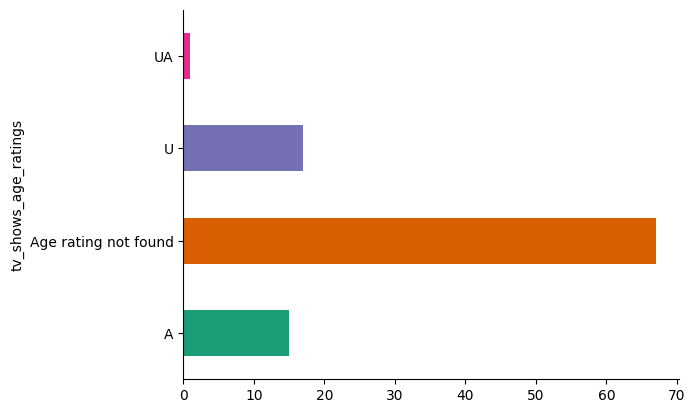

In [42]:
# @title tv_shows_age_ratings

from matplotlib import pyplot as plt
import seaborn as sns
tv_shows_dataframe.groupby('tv_shows_age_ratings').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

## **Fetching Duration Details**

In [31]:
# Write Your Code here
"""## **Fetching Duration Details**"""

# Your BeautifulSoup object for TV shows (replace this with your actual soup object)
soup2 = BeautifulSoup(page.text, 'html.parser')

# Lists to store data
tv_show_titles = []
runtimes_list2 = []

# Iterate through each TV show URL and scrape runtime
for tv_show_link in tv_show_links:
    # Extract TV show URL and prepend the base URL
    tv_show_url = urljoin(base_url, tv_show_link['href'])
    response = requests.get(tv_show_url)
    soup_tv_show = BeautifulSoup(response.text, 'html.parser')

    # Find the TV show title within the specified div and class
    title_block = soup_tv_show.find('div', class_='title-block')
    if title_block:
        tv_show_title = title_block.find('h1').text.strip()
    else:
        tv_show_title = "TV show title not found"
    tv_show_titles.append(tv_show_title)

    # Find the "Runtime" label
    runtime_label = soup_tv_show.find('h3', class_='detail-infos__subheading', string='Runtime')

    # Check if the "Runtime" label is found
    if runtime_label:
        # Find the corresponding div tag with runtime information
        runtime_div = runtime_label.find_next('div', class_='detail-infos__value')

        # Extract the numeric part of the runtime
        if runtime_div:
            runtime = runtime_div.text.strip().split()[0]
        else:
            runtime = "Runtime information not found"
    else:
        runtime = "Runtime information not found"

    # Append data to lists
    runtimes_list2.append(runtime)

# Create a DataFrame from the lists
tv_shows_dataframe = pd.DataFrame({
    'TV Show Title': tv_show_titles,
    'Runtime': runtimes_list2
})

# Display the DataFrame
tv_shows_dataframe

,TV Show Title,Runtime
0,Panchayat,33min
1,Game of Thrones,58min
2,Mirzapur,50min
3,True Detective,1h
4,Shōgun,55min
...,...,...
95,Aspirants,44min
96,Parks and Recreation,22min
97,How I Met Your Mother,24min
98,Death's Game,51min


## **Creating TV Show DataFrame**

In [44]:
# Write Your Code here
"""## **Creating TV Show DataFrame**"""

# Create a dictionary with the TV shows data
tv_shows_data = {
    'tv_show_titles': tv_show_titles,
    'tv_show_urls': tv_show_urls,
    'tv_shows_runtimes': runtimes_list2,
    'tv_shows_age_ratings': age_ratings_list2,
    'tv_shows_imdb_ratings': imdb_ratings_list2,
    'tv_shows_genres': genres_list2,
    'tv_shows_release_years': release_years_list2,
    'tv_shows_streaming_availability': streaming_availability_list2,
}

# Create a DataFrame from the dictionary
tv_shows_dataframe = pd.DataFrame(tv_shows_data)

# Display the DataFrame
tv_shows_dataframe.head(5)

tv_shows_dataframe.tail(5)



,tv_show_titles,tv_show_urls,tv_shows_runtimes,tv_shows_age_ratings,tv_shows_imdb_ratings,tv_shows_genres,tv_shows_release_years,tv_shows_streaming_availability
95,Aspirants,https://www.justwatch.com/in/tv-show/aspirants,44min,Age rating not found,9.2,Drama,2021,Streaming information not found
96,Parks and Recreation,https://www.justwatch.com/in/tv-show/parks-and...,22min,Age rating not found,8.6,Comedy,2009,Streaming information not found
97,How I Met Your Mother,https://www.justwatch.com/in/tv-show/how-i-met...,24min,U,8.3,"Comedy, Drama, Romance",2005,Streaming information not found
98,Death's Game,https://www.justwatch.com/in/tv-show/deaths-game,51min,Age rating not found,8.6,"Drama, Science-Fiction, Fantasy",2023,Streaming information not found
99,Mayor of Kingstown,https://www.justwatch.com/in/tv-show/mayor-of-...,47min,Age rating not found,8.2,"Drama, Crime, Mystery & Thriller",2021,Streaming information not found


## **Task 2 :- Data Filtering & Analysis**

In [43]:
# Write Your Code here
"""## **Task 2 :- Data Filtering & Analysis**"""

from datetime import datetime

# Get the current date
current_date = datetime.now()

# Extract the year from the current date
current_year = current_date.year

print("Current Date:", current_date)
print("Current Year:", current_year)

#function to filter only the movies and tv shows released in last 2 years from current date

from datetime import datetime
import pandas as pd

# Get the current year
current_year = datetime.now().year

# Convert 'movies_release_years' column to numeric
movies_dataframe['movies_release_years'] = pd.to_numeric(movies_dataframe['movies_release_years'], errors='coerce')
tv_shows_dataframe['tv_shows_release_years'] = pd.to_numeric(tv_shows_dataframe['tv_shows_release_years'], errors='coerce')

# Function to filter movies based on release year and arrange in descending order
def filter_and_sort_movies(movies_dataframe, current_year):
    filtered_movies = movies_dataframe[movies_dataframe['movies_release_years'].between(current_year - 2, current_year)]
    sorted_and_filterd_movies = filtered_movies.sort_values(by='movies_release_years', ascending=False)
    return sorted_and_filterd_movies

# Function to filter TV shows based on release year and arrange in descending order
def filter_and_sort_tv_shows(tv_shows_dataframe, current_year):
    filtered_tv_shows = tv_shows_dataframe[tv_shows_dataframe['tv_shows_release_years'].between(current_year - 2, current_year)]
    sorted_and_filterd_tv_shows = filtered_tv_shows.sort_values(by='tv_shows_release_years', ascending=False)
    return sorted_and_filterd_tv_shows

# Filter and sort movies and TV shows
sorted_and_filterd_movies = filter_and_sort_movies(movies_dataframe, current_year)
sorted_and_filterd_tv_shows = filter_and_sort_tv_shows(tv_shows_dataframe, current_year)


# Display the filtered DataFrames
print("Filtered Movies:")
sorted_and_filterd_movies.head(2)

sorted_and_filterd_movies.tail(2)

print("\nFiltered TV Shows:")
sorted_and_filterd_tv_shows.head(2)

print("\nFiltered TV Shows:")
sorted_and_filterd_tv_shows.tail(2)


Current Date: 2024-03-06 08:27:34.909820
Current Year: 2024
Filtered Movies:

Filtered TV Shows:

Filtered TV Shows:


,tv_show_titles,tv_show_urls,tv_shows_runtimes,tv_shows_age_ratings,tv_shows_imdb_ratings,tv_shows_genres,tv_shows_release_years,tv_shows_streaming_availability
16,Reacher,https://www.justwatch.com/in/tv-show/jack-reacher,48min,A,8.1,"Action & Adventure, Crime, Drama, Mystery & Th...",2022,Streaming information not found
40,The Bear,https://www.justwatch.com/in/tv-show/the-bear,34min,Age rating not found,8.6,"Drama, Comedy",2022,Streaming information not found


## **Calculating Mean IMDB Ratings for both Movies and Tv Shows**

In [36]:
# Write Your Code here
"""## **Calculating Mean IMDB Ratings for both Movies and Tv Shows**"""

# Calculate the mean IMDb rating for movies
mean_imdb_rating_movies = movies_dataframe['movies_imdb_ratings'].astype(float).mean()

# Calculate the mean IMDb rating for TV shows
mean_imdb_rating_tv_shows = tv_shows_dataframe['tv_shows_imdb_ratings'].astype(float).mean()

print(f"Mean IMDb Rating for Movies: {mean_imdb_rating_movies:.2f}")
print(f"Mean IMDb Rating for TV Shows: {mean_imdb_rating_tv_shows:.2f}")

"""## **Analyzing Top Genres**"""

# Analyze top genres for movies
top_genres_movies = movies_dataframe['movies_genres'].str.split(', ', expand=True).stack().value_counts().head(5)

# Analyze top genres for TV shows
top_genres_tv_shows = tv_shows_dataframe['tv_shows_genres'].str.split(', ', expand=True).stack().value_counts().head(5)

top_genres_movies_data = {
    'Genre': top_genres_movies.index,
    'Count': top_genres_movies.values
}

top_genres_tv_shows_data = {
    'Genre': top_genres_tv_shows.index,
    'Count': top_genres_tv_shows.values
}

# Create DataFrames
top_genres_movies_df = pd.DataFrame(top_genres_movies_data)
top_genres_tv_shows_df = pd.DataFrame(top_genres_tv_shows_data)

# Display DataFrames
print("Top Genres for Movies:")
top_genres_movies_df

print("\nTop Genres for TV Shows:")
top_genres_tv_shows_df




Mean IMDb Rating for Movies: 7.19
Mean IMDb Rating for TV Shows: 7.96
Top Genres for Movies:

Top Genres for TV Shows:


,Genre,Count
0,Drama,80
1,Mystery & Thriller,37
2,Action & Adventure,36
3,Crime,33
4,Comedy,29


In [35]:
pip install wordcloud

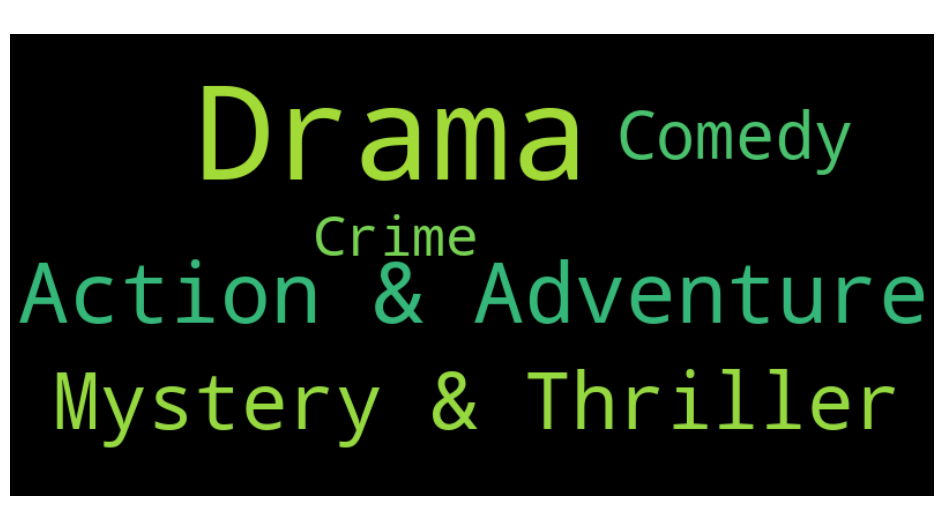

In [37]:


from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Generate a word cloud for movies
wordcloud_movies = WordCloud(
    width=800,
    height=400,
    background_color='black',
    colormap='viridis',
    max_words=100,
    contour_width=3,
    contour_color='steelblue',
).generate_from_frequencies(top_genres_movies)

# Plot the word cloud for movies
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_movies, interpolation='bilinear')
plt.title('Top Genres for Movies', fontsize=16, color='white')
plt.axis('off')
plt.show()

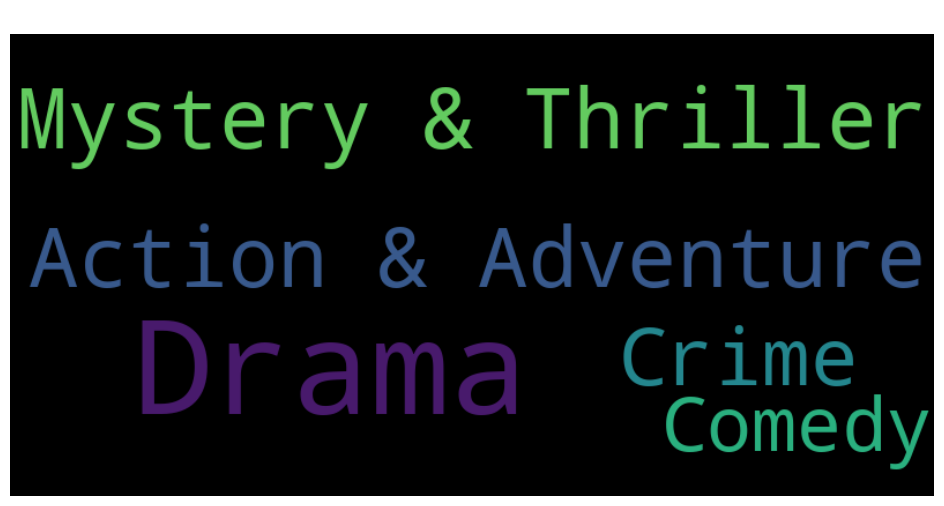

In [38]:
# Generate a word cloud for TV shows
wordcloud_tv_shows = WordCloud(
    width=800,
    height=400,
    background_color='black',
    colormap='viridis',
    max_words=100,
    contour_width=3,
    contour_color='steelblue',
).generate_from_frequencies(top_genres_tv_shows)

# Plot the word cloud for TV shows
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_tv_shows, interpolation='bilinear')
plt.title('Top Genres for TV Shows', fontsize=16, color='white')
plt.axis('off')
plt.show()

## **Analyzing Top Genres**

Top Genres for Movies:

Top Genres for TV Shows:


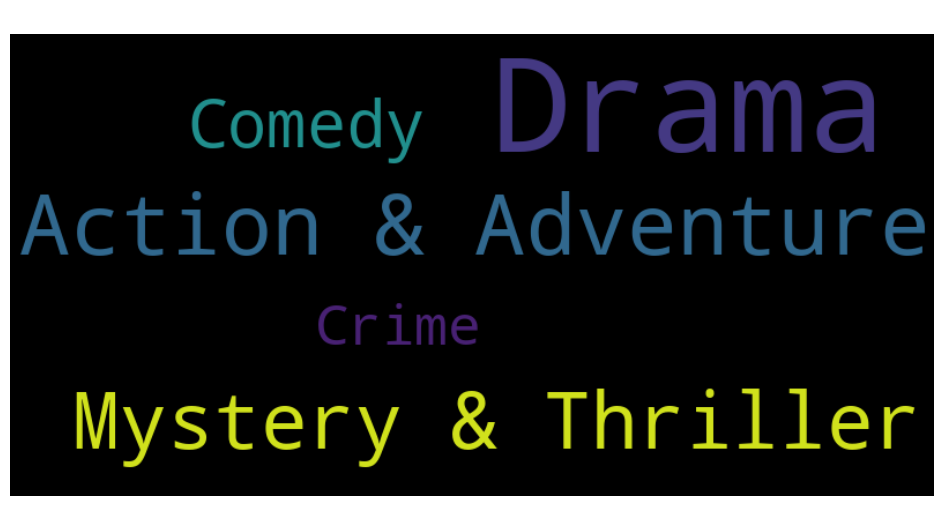

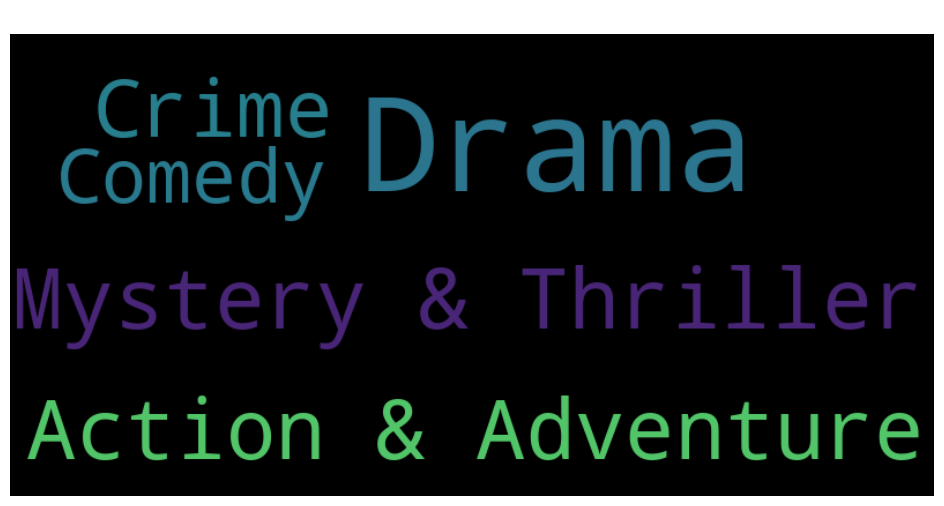

In [46]:
# Write Your Code here
# Analyze top genres for movies
top_genres_movies = movies_dataframe['movies_genres'].str.split(', ', expand=True).stack().value_counts().head(5)

# Analyze top genres for TV shows
top_genres_tv_shows = tv_shows_dataframe['tv_shows_genres'].str.split(', ', expand=True).stack().value_counts().head(5)

top_genres_movies_data = {
    'Genre': top_genres_movies.index,
    'Count': top_genres_movies.values
}

top_genres_tv_shows_data = {
    'Genre': top_genres_tv_shows.index,
    'Count': top_genres_tv_shows.values
}

# Create DataFrames
top_genres_movies_df = pd.DataFrame(top_genres_movies_data)
top_genres_tv_shows_df = pd.DataFrame(top_genres_tv_shows_data)

# Display DataFrames
print("Top Genres for Movies:")
top_genres_movies_df

print("\nTop Genres for TV Shows:")
top_genres_tv_shows_df

# Generate a word cloud for movies
wordcloud_movies = WordCloud(
    width=800,
    height=400,
    background_color='black',
    colormap='viridis',
    max_words=100,
    contour_width=3,
    contour_color='steelblue',
).generate_from_frequencies(top_genres_movies)

# Plot the word cloud for movies
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_movies, interpolation='bilinear')
plt.title('Top Genres for Movies', fontsize=16, color='white')
plt.axis('off')
plt.show()
# Generate a word cloud for TV shows
wordcloud_tv_shows = WordCloud(
    width=800,
    height=400,
    background_color='black',
    colormap='viridis',
    max_words=100,
    contour_width=3,
    contour_color='steelblue',
).generate_from_frequencies(top_genres_tv_shows)

# Plot the word cloud for TV shows
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_tv_shows, interpolation='bilinear')
plt.title('Top Genres for TV Shows', fontsize=16, color='white')
plt.axis('off')
plt.show()


In [ ]:
#Let's Visvalize it using word cloud


## **Finding Predominant Streaming Service**

In [39]:
"""## **Finding Predominant Streaming Service**"""

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Extract streaming services for movies and TV shows
streaming_services_movies = movies_dataframe['movies_streaming_availability'].str.split(', ', expand=True).stack().value_counts()
streaming_services_tv_shows = tv_shows_dataframe['tv_shows_streaming_availability'].str.split(', ', expand=True).stack().value_counts()


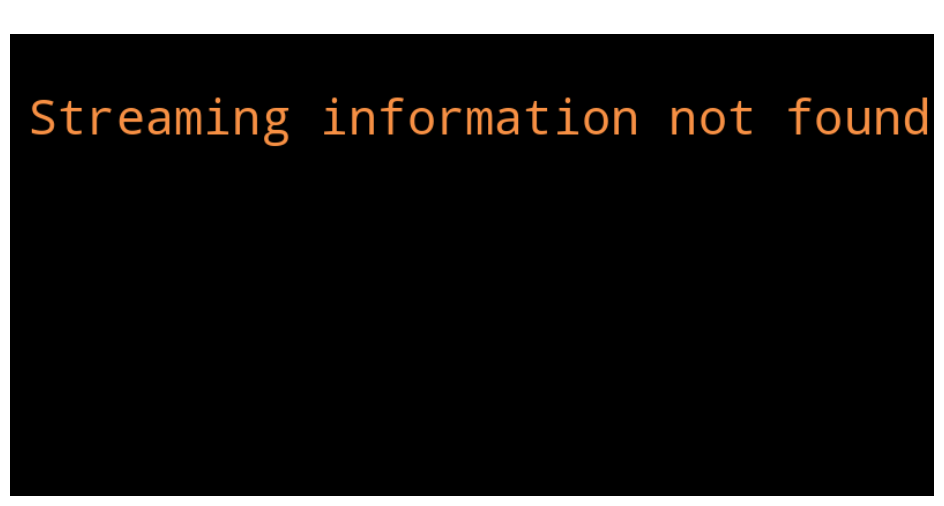

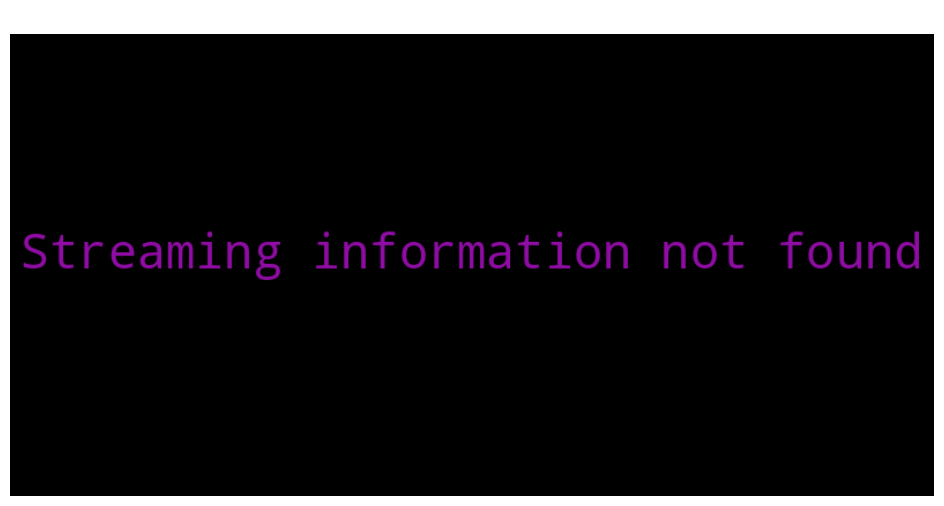

In [40]:
#Let's Visvalize it using word cloud
# Generate a word cloud for streaming services in movies
wordcloud_movies_services = WordCloud(
    width=800,
    height=400,
    background_color='black',
    colormap='plasma',
    max_words=100,
    contour_width=3,
    contour_color='orange',
).generate_from_frequencies(streaming_services_movies)

# Plot the word cloud for streaming services in movies
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_movies_services, interpolation='bilinear')
plt.title('Predominant Streaming Services for Movies', fontsize=16, color='white')
plt.axis('off')
plt.show()

# Generate a word cloud for streaming services in TV shows
wordcloud_tv_shows_services = WordCloud(
    width=800,
    height=400,
    background_color='black',
    colormap='plasma',
    max_words=100,
    contour_width=3,
    contour_color='orange',
).generate_from_frequencies(streaming_services_tv_shows)

# Plot the word cloud for streaming services in TV shows
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_tv_shows_services, interpolation='bilinear')
plt.title('Predominant Streaming Services for TV Shows', fontsize=16, color='white')
plt.axis('off')
plt.show()

## **Task 3 :- Data Export**

In [ ]:
#saving final dataframe as Final Data in csv format


In [41]:
#saving filter data as Filter Data in csv format
"""## **Task 3 :- Data Export**"""

#saving final dataframe as Final Data in csv format
# Save filtered movies dataframe to CSV
movies_dataframe.to_csv('movies_data.csv', index=False)

# Save filtered TV shows dataframe to CSV
tv_shows_dataframe.to_csv('tv_shows_data.csv', index=False)

#saving filter data as Filter Data in csv format

# Save filtered movies dataframe to CSV
sorted_and_filterd_movies.to_csv('filtered_movies_data.csv', index=False)

# Save filtered TV shows dataframe to CSV
sorted_and_filterd_tv_shows.to_csv('filtered_tv_shows_data.csv', index=False)


# **Dataset Drive Link (View Access with Anyone) -**

***https://drive.google.com/drive/folders/1kDNI_JnqF0un6JoZDr0EbQxJY78npFhD?usp=sharing***

# ***Congratulations!!! You have completed your Assignment.***